In [1]:
import pandas as pd
pd.set_option('max_row',300) 
import os
import numpy as np
import tushare as ts

import sys
sys.path.append("../utils/")
import date_util
import enter_util
import plot_util
import token_util
import data_util

auth success 


##### 判断原则：达到要求后选vol_mean_20最大的，ST股票不买
##### 若不是选最大的，则查看其前段时间的增长速率，以及eda,dif的高度

### 计算当天可购买的原始数据

1. dea - macd < 0.2
2. macd 小于最近两个月的macd最大值

In [2]:
concept_list = ['GN201', 'GN162', 'GN1050', 'GN228', 'GN1021', 'GN210', 'GN215', 'GN665']
industry_list = ['801085', '801156', '801124']

stock_list = data_util.get_industry_concept(industry_list, concept_list)
stock_list = list(set(stock_list))

一个月内有上涨趋势就行(周k)。日k不高开低走，且dif,dea与macd差值较小

In [38]:
date = "20191010"
date, raw_choose = enter_util.get_weekk_condidate_stock(date, stock_list_root=stock_list)
choose_list = enter_util.get_condidate_stock(date, raw_choose)

In [39]:
choose_list

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
0,2737,002241.SZ,20191010,None,0.961791,-2.039131,3.272353,0.255172,0.586216
1,514,603127.SH,20191010,None,2.431093,-0.568251,-0.627702,0.373314,0.564800
2,2886,002152.SZ,20191010,None,-0.521237,-1.165770,1.658684,2.208424,0.383897
3,2294,002352.SZ,20191010,None,0.695455,0.772025,-0.208443,-0.121290,0.297095
4,3513,600986.SH,20191010,None,-0.762643,0.745203,0.529304,1.225496,0.271208
5,504,603882.SH,20191010,None,2.094997,-0.986803,-0.538917,-0.640873,0.195181
6,3138,002044.SZ,20191010,None,-0.394986,0.971300,0.220208,0.070666,0.133939
7,924,603866.SH,20191010,None,0.195245,0.523147,-0.644165,0.447134,0.123797
8,2057,601799.SH,20191010,None,1.141755,0.845730,-0.654017,-1.799764,0.020916
9,117,603317.SH,20191010,None,-0.075211,-0.126221,-0.575103,0.869075,0.010987


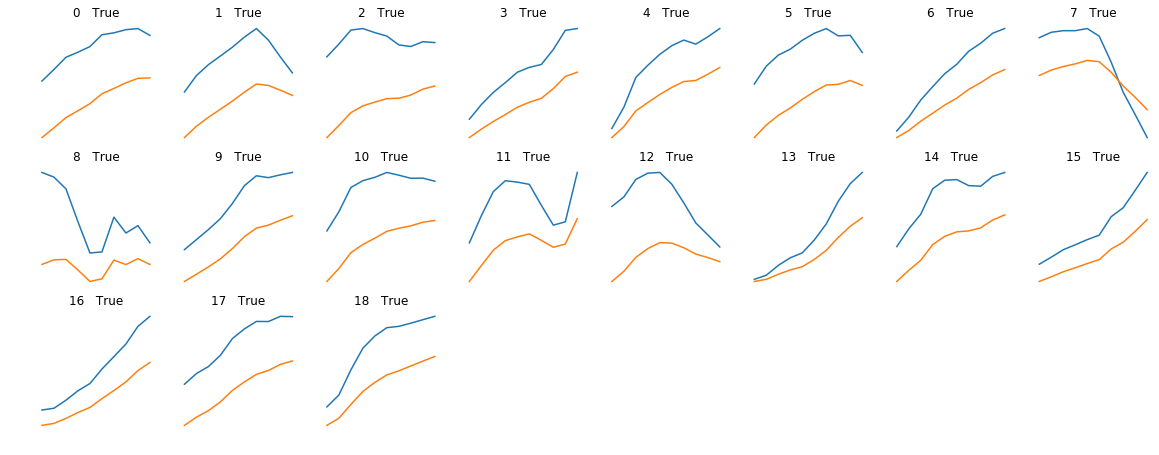

In [40]:
choose_data_plot = enter_util.enter_for_plot(choose_list)
enter_true, enter_false, enter_discount = plot_util.plot_enter(choose_data_plot)

In [ ]:
date = "20191104"
date, raw_choose = enter_util.get_weekk_condidate_stock(date)
choose_list = enter_util.get_condidate_stock(date, raw_choose)

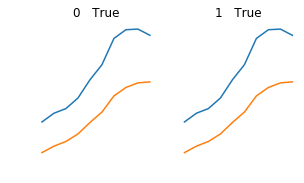

In [9]:
choose_data_plot = enter_util.enter_for_plot(choose_list)
enter_true, enter_false, enter_discount = plot_util.plot_enter(choose_data_plot)

In [8]:
date = "20191014"
date, raw_choose = enter_util.get_weekk_condidate_stock(date)
choose_list = enter_util.get_condidate_stock(date, raw_choose)

In [9]:
choose_list

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
0,349,603259.SH,20191014,药明康德,4.795045,-0.301175,-0.239541,0.186589,1.367688
1,3984,000636.SZ,20191014,风华高科,0.559020,-0.563463,3.602630,0.320302,0.839600
2,1666,002660.SZ,20191014,茂硕电源,-0.334617,-0.797972,0.825261,2.583793,0.421831
3,3984,000861.SZ,20191014,海印股份,-0.687058,0.734418,-0.025346,1.180541,0.171805
4,1632,002464.SZ,20191014,众应互联,0.049979,-2.815743,2.490877,1.089235,0.167868
5,3783,600552.SH,20191014,凯盛科技,-0.562663,0.389501,0.710661,0.476383,0.146510
6,1970,601567.SH,20191014,三星医疗,-0.313388,-0.456794,-0.331262,1.830771,0.114527
7,3984,600201.SH,20191014,生物股份,0.363941,-0.248085,1.082162,-0.819403,0.112117
8,576,603042.SH,20191014,华脉科技,0.276933,-1.104669,-0.137936,1.330133,0.100586
9,3547,002019.SZ,20191014,亿帆医药,-0.086968,0.379540,0.085773,-0.007321,0.065508


In [128]:
# 在计算时已取反，故为大于
min_index = choose_list["dif_dea_day"].idxmin()
test1 = choose_list.drop([min_index], axis=0)
test1 = test1[test1["dif_dea_day"] > test1["dif_dea_day"].mean()]

In [129]:
test1 # len(test1)>8进行下一步 

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
1,3981,600606.SH,20191009,绿地控股,-0.796521,1.248763,2.158524,0.021859,0.446873
5,3155,002058.SZ,20191009,威尔泰,-0.444003,0.306885,-0.857226,1.679981,0.092727
8,1087,002730.SZ,20191009,电光科技,-0.561798,0.452911,-0.231078,-0.688123,-0.261797
9,661,603038.SH,20191009,华立股份,-0.567459,0.828105,-0.908889,-0.549986,-0.296391
10,514,603181.SH,20191009,皇马科技,-0.683970,0.998456,-0.598613,-1.214582,-0.368139
11,498,603321.SH,20191009,梅轮电梯,-0.545173,0.288617,-0.619991,-1.093405,-0.448508


In [104]:
min_index = test1["dif_dea"].idxmin()
test3 = test1.drop([min_index], axis=0)
test3= test3[test3["dif_dea"] > test3["dif_dea"].mean()]

In [105]:
test3 # len(test3) <= len(test2) / 2 返回上一步

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
2,665,603040.SH,20191101,新坐标,0.368409,0.692597,-0.719945,1.334460,0.371945
10,867,603919.SH,20191101,金徽酒,-0.161873,0.449727,-0.445705,-0.671807,-0.182119


In [72]:
min_index = test1["dif_dea_day"].idxmin()
# max_index = test1["dif_dea_day"].idxmax()
test2 = test1.drop([min_index], axis=0)
test2 = test2[test2["dif_dea_day"] > test2["dif_dea_day"].mean()]

In [73]:
test2 # len(test2)>=8进行下一步

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
4,3984,000513.SZ,20191014,丽珠集团,-0.360409,1.511514,0.006394,-0.412238,0.113011
11,2303,601158.SH,20191014,重庆水务,-0.618273,1.189268,-0.705426,0.259034,-0.036907
18,3984,000153.SZ,20191014,丰原药业,-0.600807,1.170344,-0.670044,-0.752994,-0.230781
20,581,603855.SH,20191014,华荣股份,-0.625325,1.496446,-0.780362,-1.302547,-0.304890


重点关注test4，但也不忽视test2

In [21]:
min_index = test2["vol_mean_20"].idxmin()
test4 = test2.drop([min_index], axis=0)
test4= test4[test4["vol_mean_20"] > test4["vol_mean_20"].mean()]

In [22]:
test4 # len(test4) <= len(test2) / 2 返回上一步

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
8,1800,002657.SZ,20191105,中科金财,-0.681083,1.015753,-0.281779,0.881191,0.118708
31,4000,600869.SH,20191105,智慧能源,-0.621769,0.766664,0.115307,-1.440493,-0.298235


### 对周k值进行筛选，剔除月k增长过慢的数据(0.04)

In [191]:
test_dif_dea = choose_list[choose_list["dif_dea"] > 0.05 ]

In [192]:
test_dif_dea

,index,stock_code,trade_date,name,dif_dea,dif_dea_0,revenue_mean,vol_mean_20,vol_discount_mean,rank_factor
1,3960,000519.SZ,20190902,中兵红箭,0.096063,-0.003129,0.708039,495468.7315,1.748179,99094.230960
7,2890,601808.SH,20190902,中海油服,0.159121,-0.004853,0.786317,102085.7880,1.528857,20417.629055
8,3960,000950.SZ,20190902,重药控股,0.053289,-0.005262,0.688062,91999.8085,1.667091,18400.414314
11,3434,002025.SZ,20190902,航天电器,0.346147,0.019806,0.827409,70923.0915,0.968324,14185.039920
19,2421,002294.SZ,20190902,信立泰,0.065282,-0.002448,0.658768,42178.3145,1.370126,8436.055325
21,3960,001872.SZ,20190902,招商港口,0.139084,0.009176,0.733599,34805.2205,1.381836,6961.472232
22,1024,002755.SZ,20190902,奥赛康,0.056974,-0.010211,0.695590,33454.3490,1.420239,6691.275278
27,781,002801.SZ,20190902,微光股份,0.357187,0.030788,0.790432,19549.0750,1.105348,3910.261791
28,726,603520.SH,20190902,司太立,0.091267,-0.006715,0.734482,18460.6960,1.545366,3692.585826
30,1197,603806.SH,20190902,福斯特,0.289425,0.020582,0.593928,14592.7600,1.292178,2918.986352


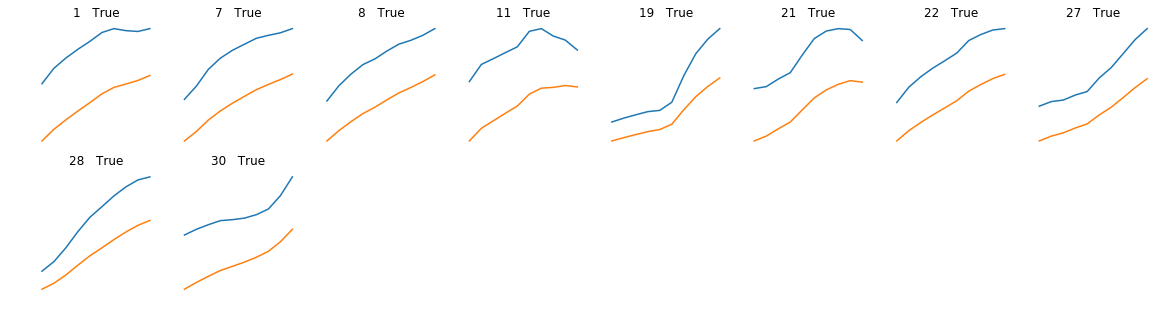

In [193]:
test_dif_dea_plot = enter_util.enter_for_plot(test_dif_dea)
enter_true, enter_false, enter_discount = plot_util.plot_enter(test_dif_dea_plot)

In [181]:
enter_discount

1.0

### 对日k进行筛选，剔除dif，dea较大的数据(待定)

In [194]:
test_dif_dea_0 = test_dif_dea[test_dif_dea["dif_dea_0"] < 0.022 ]

In [195]:
test_dif_dea_0

,index,stock_code,trade_date,name,dif_dea,dif_dea_0,revenue_mean,vol_mean_20,vol_discount_mean,rank_factor
1,3960,000519.SZ,20190902,中兵红箭,0.096063,-0.003129,0.708039,495468.7315,1.748179,99094.230960
7,2890,601808.SH,20190902,中海油服,0.159121,-0.004853,0.786317,102085.7880,1.528857,20417.629055
8,3960,000950.SZ,20190902,重药控股,0.053289,-0.005262,0.688062,91999.8085,1.667091,18400.414314
11,3434,002025.SZ,20190902,航天电器,0.346147,0.019806,0.827409,70923.0915,0.968324,14185.039920
19,2421,002294.SZ,20190902,信立泰,0.065282,-0.002448,0.658768,42178.3145,1.370126,8436.055325
21,3960,001872.SZ,20190902,招商港口,0.139084,0.009176,0.733599,34805.2205,1.381836,6961.472232
22,1024,002755.SZ,20190902,奥赛康,0.056974,-0.010211,0.695590,33454.3490,1.420239,6691.275278
28,726,603520.SH,20190902,司太立,0.091267,-0.006715,0.734482,18460.6960,1.545366,3692.585826
30,1197,603806.SH,20190902,福斯特,0.289425,0.020582,0.593928,14592.7600,1.292178,2918.986352


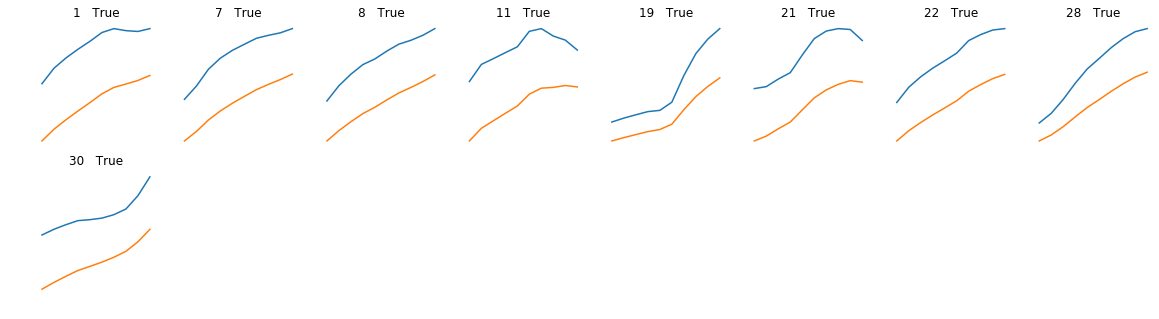

In [196]:
test_dif_dea_0_plot = enter_util.enter_for_plot(test_dif_dea_0)
enter_true, enter_false, enter_discount = plot_util.plot_enter(test_dif_dea_0_plot)

In [173]:
enter_discount

1.0